In [58]:
!pip install pandas sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [59]:
import pandas as pd
import sqlite3

# Load your CSV
df = pd.read_csv("retail_store_inventory.csv")

# Create SQLite database file
conn = sqlite3.connect("mydata.db")

# Convert CSV table into SQLite table
df.to_sql("mytable", conn, if_exists="replace", index=False)

conn.close()

print("CSV successfully converted to SQLite!")


CSV successfully converted to SQLite!


In [60]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("mydata.db")

df = pd.read_sql("SELECT * FROM mytable;", conn)

print(df)
conn.close()


             Date Store ID Product ID     Category Region  Inventory Level  \
0      2022-01-01     S001      P0001    Groceries  North              231   
1      2022-01-01     S001      P0002         Toys  South              204   
2      2022-01-01     S001      P0003         Toys   West              102   
3      2022-01-01     S001      P0004         Toys  North              469   
4      2022-01-01     S001      P0005  Electronics   East              166   
...           ...      ...        ...          ...    ...              ...   
73095  2024-01-01     S005      P0016    Furniture   East               96   
73096  2024-01-01     S005      P0017         Toys  North              313   
73097  2024-01-01     S005      P0018     Clothing   West              278   
73098  2024-01-01     S005      P0019         Toys   East              374   
73099  2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  Disco

In [8]:

import numpy as np
import pandas as pd 


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("retail_store_inventory.csv")

# Shape & preview
print("Shape:", df.shape)
df.head()

Shape: (73100, 15)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [3]:
# Info about dataset
df.info()

# Missing values
df.isnull().sum()

# Summary stats
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [4]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [5]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract week number and year
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

# Quick check
df[['Date', 'Week', 'Year']].head()

,Date,Week,Year
0,2022-01-01,52,2022
1,2022-01-01,52,2022
2,2022-01-01,52,2022
3,2022-01-01,52,2022
4,2022-01-01,52,2022


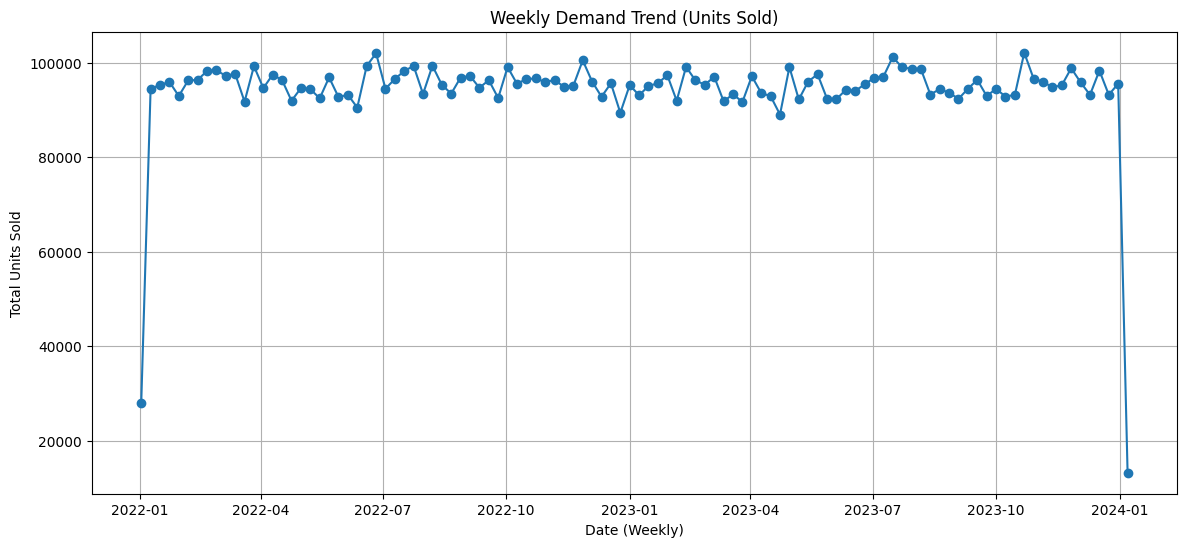

In [7]:
# Convert Date properly
df['Date'] = pd.to_datetime(df['Date'])

# Group by actual Date week
weekly_demand = df.resample('W', on='Date')['Units Sold'].sum().reset_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(weekly_demand['Date'], weekly_demand['Units Sold'], marker='o')
plt.title("Weekly Demand Trend (Units Sold)")
plt.xlabel("Date (Weekly)")
plt.ylabel("Total Units Sold")
plt.grid(True)
plt.show()

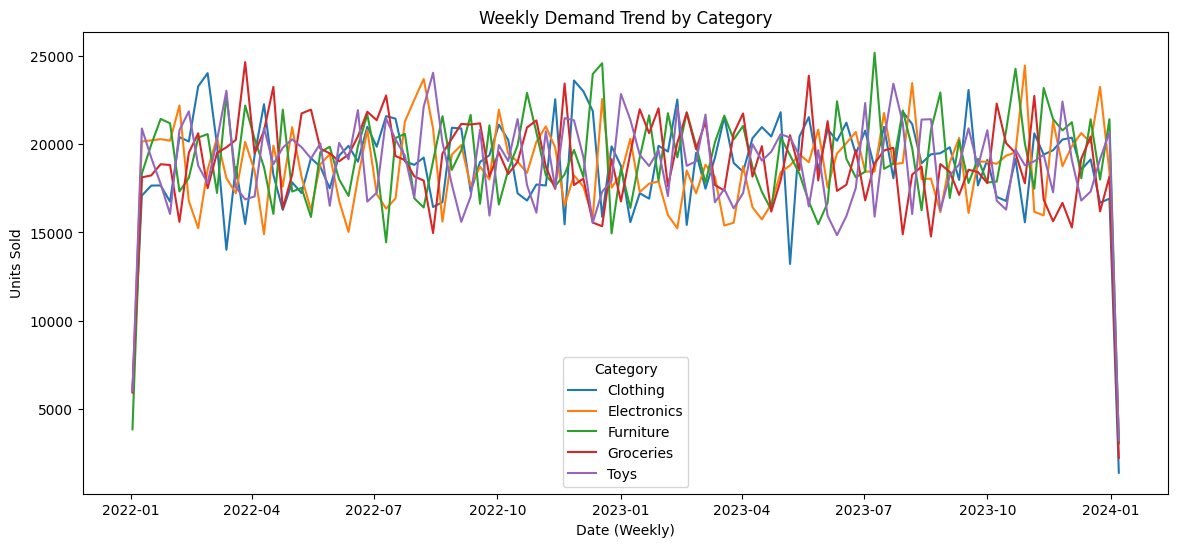

In [8]:
import seaborn as sns

# Weekly demand by category
weekly_cat = df.set_index('Date').groupby('Category').resample('W')['Units Sold'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=weekly_cat, x="Date", y="Units Sold", hue="Category")
plt.title("Weekly Demand Trend by Category")
plt.xlabel("Date (Weekly)")
plt.ylabel("Units Sold")
plt.legend(title="Category")
plt.show()

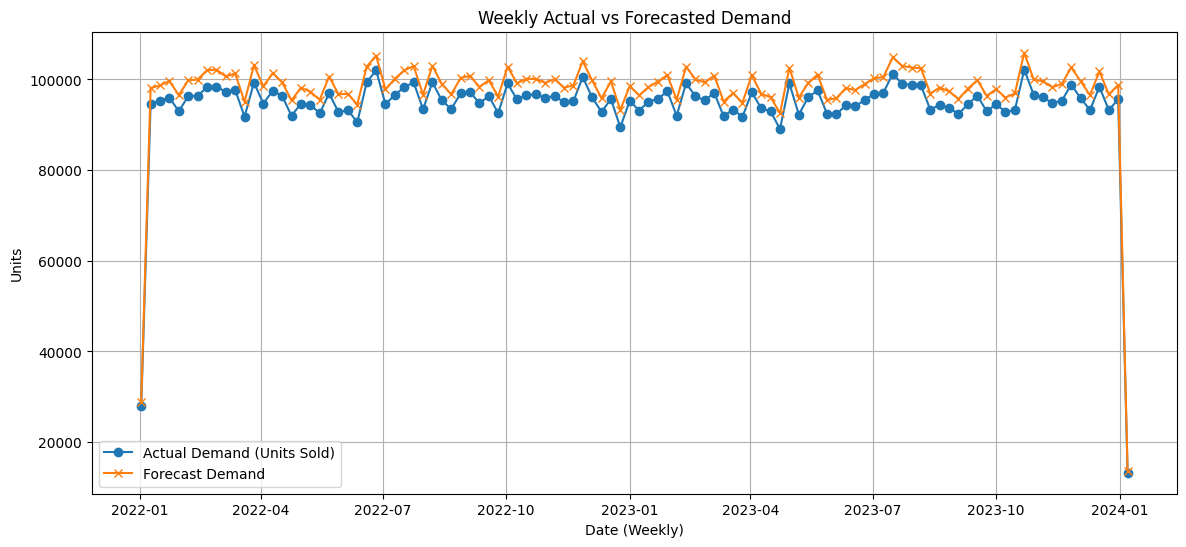

In [9]:
weekly_compare = df.resample('W', on='Date')[['Units Sold','Demand Forecast']].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(weekly_compare['Date'], weekly_compare['Units Sold'], label="Actual Demand (Units Sold)", marker='o')
plt.plot(weekly_compare['Date'], weekly_compare['Demand Forecast'], label="Forecast Demand", marker='x')
plt.title("Weekly Actual vs Forecasted Demand")
plt.xlabel("Date (Weekly)")
plt.ylabel("Units")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
weekly_change = df.resample('W', on='Date')['Units Sold'].sum().reset_index()
weekly_change['WoW Change (%)'] = weekly_change['Units Sold'].pct_change() * 100

weekly_change.tail(10)  # show last 10 weeks

,Date,Units Sold,WoW Change (%)
96,2023-11-05,96021,-0.642578
97,2023-11-12,94812,-1.259100
98,2023-11-19,95286,0.499937
99,2023-11-26,98877,3.768654
100,2023-12-03,95876,-3.035084
101,2023-12-10,93234,-2.755643
102,2023-12-17,98369,5.507647
103,2023-12-24,93248,-5.205908
104,2023-12-31,95607,2.529813
105,2024-01-07,13244,-86.147458


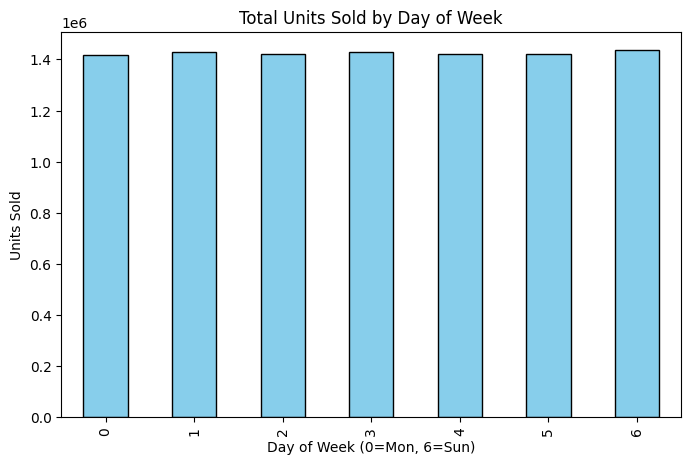

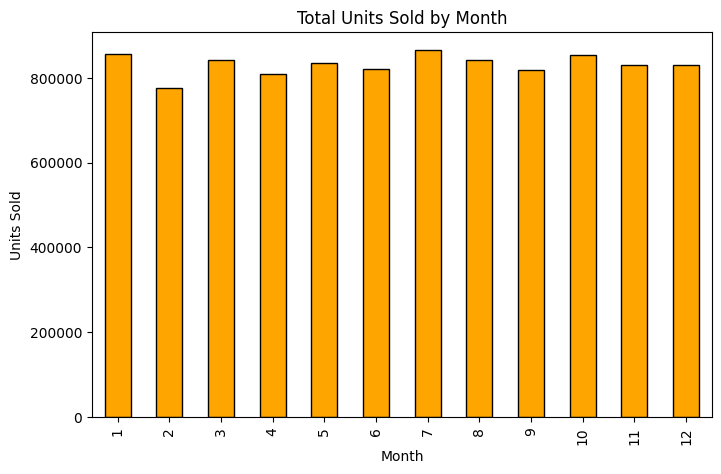

In [11]:
df['DayOfWeek'] = df['Date'].dt.dayofweek
dow_sales = df.groupby('DayOfWeek')['Units Sold'].sum()

plt.figure(figsize=(8,5))
dow_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Units Sold by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Units Sold")
plt.show()

# Monthly Pattern
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Units Sold'].sum()

plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Total Units Sold by Month")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.show()


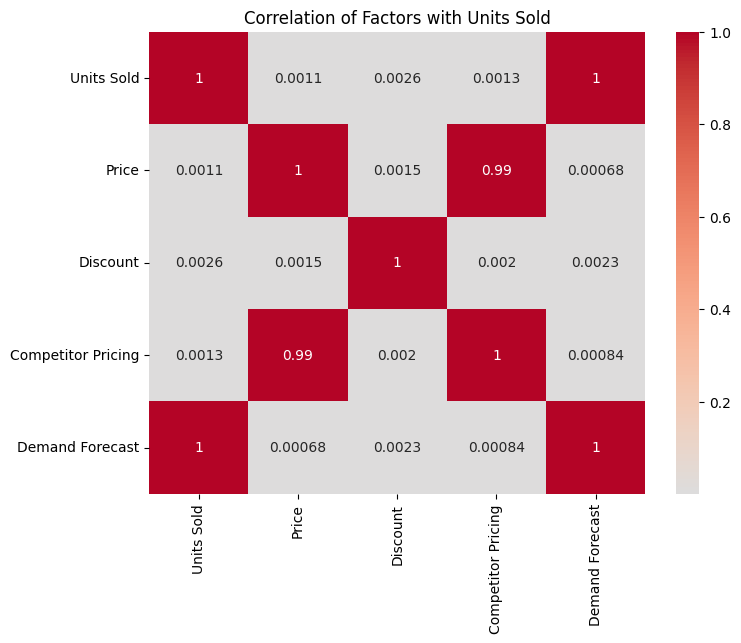

In [12]:
corr = df[['Units Sold','Price','Discount','Competitor Pricing','Demand Forecast']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Factors with Units Sold")
plt.show()

In [53]:
df.head(25)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,DayOfWeek,Month,lag_1,lag_7,lag_30,rolling_7,rolling_30,price_after_discount,inventory_to_sales_ratio,competitor_price_gap
0,2022-01-31,0,0,0,3,410,200,152,212.24,70.78,...,0,1,130.0,9.0,127.0,97.857143,114.233333,70.78,2.039801,-1.90
1,2022-01-31,3,17,2,3,111,106,184,116.21,16.00,...,0,1,231.0,165.0,8.0,188.142857,141.600000,-224.00,1.037383,-4.68
2,2022-01-31,0,11,0,0,159,102,158,104.73,66.78,...,0,1,26.0,51.0,24.0,30.428571,75.700000,66.78,1.543689,-0.92
3,2022-01-31,4,1,3,0,462,105,120,119.86,51.41,...,0,1,83.0,135.0,298.0,85.000000,161.800000,-462.69,4.358491,-0.68
4,2022-01-31,4,18,0,1,191,1,56,-2.84,71.67,...,0,1,50.0,183.0,106.0,149.000000,158.633333,71.67,95.500000,2.63
5,2022-01-31,0,12,3,0,284,54,132,72.64,39.94,...,0,1,176.0,102.0,42.0,142.571429,120.033333,-359.46,5.163636,-3.68
6,2022-01-31,0,9,1,2,387,319,120,327.90,28.94,...,0,1,207.0,3.0,28.0,80.428571,92.300000,-260.46,1.209375,0.29
7,2022-01-31,0,13,0,3,278,217,159,213.69,84.93,...,0,1,128.0,20.0,12.0,152.571429,103.633333,-1613.67,1.275229,-4.71
8,2022-01-31,4,2,1,2,447,336,164,334.62,87.63,...,0,1,374.0,282.0,64.0,216.857143,163.466667,87.63,1.326409,4.12
9,2022-01-31,4,0,2,3,472,290,94,298.53,51.80,...,0,1,86.0,90.0,77.0,89.285714,108.833333,-207.20,1.621993,3.65


In [14]:
from sklearn.preprocessing import LabelEncoder

le_store = LabelEncoder()
le_product = LabelEncoder()
le_category = LabelEncoder()
le_region = LabelEncoder()
le_weather = LabelEncoder()
le_holiday = LabelEncoder()
le_season = LabelEncoder()

df["Store ID"] = le_store.fit_transform(df["Store ID"])
df["Product ID"] = le_product.fit_transform(df["Product ID"])
df["Category"] = le_category.fit_transform(df["Category"])
df["Region"] = le_region.fit_transform(df["Region"])
df["Weather Condition"] = le_weather.fit_transform(df["Weather Condition"])
df["Holiday/Promotion"] = le_holiday.fit_transform(df["Holiday/Promotion"])
df["Seasonality"] = le_season.fit_transform(df["Seasonality"])


In [15]:
df = df.sort_values(["Store ID", "Product ID", "Date"])

df["lag_1"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].shift(1)
df["lag_7"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].shift(7)
df["lag_30"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].shift(30)

df["rolling_7"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].shift(1).rolling(7).mean()
df["rolling_30"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].shift(1).rolling(30).mean()


In [16]:
df["price_after_discount"] = df["Price"] * (1 - df["Discount"])
df["inventory_to_sales_ratio"] = df["Inventory Level"] / (df["Units Sold"] + 1)
df["competitor_price_gap"] = df["Competitor Pricing"] - df["Price"]


In [17]:
df = df.dropna()


In [18]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,DayOfWeek,Month,lag_1,lag_7,lag_30,rolling_7,rolling_30,price_after_discount,inventory_to_sales_ratio,competitor_price_gap
3000,2022-01-31,0,0,0,3,410,200,152,212.24,70.78,...,0,1,130.0,9.0,127.0,97.857143,114.233333,70.78,2.039801,-1.90
3100,2022-02-01,0,0,3,0,419,279,84,297.26,34.49,...,1,2,200.0,189.0,81.0,125.142857,116.666667,34.49,1.496429,-0.64
3200,2022-02-02,0,0,1,2,415,38,149,53.13,52.49,...,2,2,279.0,49.0,5.0,138.000000,123.266667,-209.96,10.641026,-4.24
3300,2022-02-03,0,0,0,2,345,71,186,84.02,27.71,...,3,2,38.0,164.0,58.0,136.428571,124.366667,-526.49,4.791667,1.25
3400,2022-02-04,0,0,2,2,121,25,25,37.72,16.84,...,4,2,71.0,97.0,147.0,123.142857,124.800000,-235.76,4.653846,-4.31


In [30]:
print(df["Date"].min(), df["Date"].max())


2022-01-31 00:00:00 2024-01-01 00:00:00


In [31]:
df = df.sort_values("Date").reset_index(drop=True)

split_idx = int(len(df) * 0.8)  # 80% for training
train = df.iloc[:split_idx]
test  = df.iloc[split_idx:]

X_train = train.drop(columns=["Units Sold", "Date"])
y_train = train["Units Sold"]

X_test = test.drop(columns=["Units Sold", "Date"])
y_test = test["Units Sold"]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (56080, 25)
y_train: (56080,)
X_test: (14020, 25)
y_test: (14020,)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R²:", r2)


Random Forest RMSE: 3.4140870171968496
Random Forest R²: 0.9990012315414987


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators": [200, 300, 500, 700],      # number of trees
    "max_depth": [10, 20, 25, 30, None],      # depth of trees
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # number of combinations to try
    scoring="neg_root_mean_squared_error",  # RMSE
    cv=3,                   # 3-fold time-based CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_rf = random_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Tuned Random Forest RMSE:", rmse)
print("Tuned Random Forest R²:", r2)



In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# To avoid divide-by-zero in MAPE
y_true_safe = np.where(y_test == 0, 1, y_test)
mape = np.mean(np.abs((y_test - y_pred) / y_true_safe))

# Final JSON-style output
output = {
    "model": "RandomForest",
    "rmse": round(rmse, 3),
    "mae": round(mae, 3),
    "mape": round(mape, 3)
}

print(output)


{'model': 'RandomForest', 'rmse': 3.414, 'mae': 2.287, 'mape': 0.018}


In [42]:
def forecast_future_months(model, df, X_train, periods=6):
    df = df.sort_values("Date").copy()
    future_predictions = []

    feature_cols = X_train.columns  # only use valid features the model was trained on

    for i in range(periods):

        last = df.iloc[-1].copy()
        next_date = last["Date"] + pd.DateOffset(months=1)

        new_row = {}

        # Always include Date
        new_row["Date"] = next_date

        # Add date-related features IF they exist in X_train
        if "Month" in feature_cols:
            new_row["Month"] = next_date.month
        if "Year" in feature_cols:
            new_row["Year"] = next_date.year
        if "Week" in feature_cols:
            new_row["Week"] = next_date.week
        if "DayOfWeek" in feature_cols:
            new_row["DayOfWeek"] = next_date.dayofweek

        # Add static or repeated features if they were used in training
        for col in feature_cols:
            if col in last.index and col not in ["Date", "Units Sold",
                                                 "lag_1", "lag_7", "lag_30",
                                                 "rolling_7", "rolling_30",
                                                 "Month", "Year", "Week", "DayOfWeek"]:
                new_row[col] = last[col]

        # LAG FEATURES
        if "lag_1" in feature_cols:
            new_row["lag_1"] = last["Units Sold"]

        if "lag_7" in feature_cols:
            new_row["lag_7"] = df["Units Sold"].iloc[-7:].mean()

        if "lag_30" in feature_cols:
            new_row["lag_30"] = df["Units Sold"].iloc[-30:].mean()

        # ROLLING FEATURES
        if "rolling_7" in feature_cols:
            new_row["rolling_7"] = df["Units Sold"].rolling(7).mean().iloc[-1]

        if "rolling_30" in feature_cols:
            new_row["rolling_30"] = df["Units Sold"].rolling(30).mean().iloc[-1]

        # Create DataFrame
        new_row_df = pd.DataFrame([new_row])

        # Align columns with training
        new_row_df = new_row_df[feature_cols]

        # Predict
        pred = model.predict(new_row_df)[0]

        future_predictions.append({"Date": next_date, "Predicted_Units_Sold": pred})

        # Append prediction for next iteration
        new_row_appended = last.copy()
        new_row_appended["Date"] = next_date
        new_row_appended["Units Sold"] = pred
        df = pd.concat([df, new_row_appended.to_frame().T], ignore_index=True)

    return pd.DataFrame(future_predictions)


In [43]:
future_df = forecast_future_months(rf_model, df, X_train, periods=6)
print(future_df)


        Date  Predicted_Units_Sold
0 2024-02-01              6.479277
1 2024-03-01              6.472641
2 2024-04-01              6.467978
3 2024-05-01              6.505493
4 2024-06-01              6.499493
5 2024-07-01              6.500525


In [50]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------------------------------
# FIX: Convert all features to numeric + float32
# ----------------------------------------------------
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float32)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float32)

# ----------------------------------------------------
# STEP 1: Create LSTM sequences
# ----------------------------------------------------
def create_lstm_sequences(X, y, lookback=12):
    X_seq, y_seq = [], []
    for i in range(len(X) - lookback):
        X_seq.append(X.iloc[i:i + lookback].values)
        y_seq.append(y.iloc[i + lookback])
    return np.array(X_seq), np.array(y_seq)

lookback = 12

X_train_seq, y_train_seq = create_lstm_sequences(X_train, y_train, lookback)
X_test_seq, y_test_seq = create_lstm_sequences(X_test, y_test, lookback)

print("Training seq shape:", X_train_seq.shape)
print("Test seq shape:", X_test_seq.shape)

# ----------------------------------------------------
# STEP 2: Build LSTM model
# ----------------------------------------------------
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(lookback, X_train.shape[1])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# ----------------------------------------------------
# STEP 3: Train
# ----------------------------------------------------
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# ----------------------------------------------------
# STEP 4: Predict
# ----------------------------------------------------
y_pred = lstm_model.predict(X_test_seq).flatten()

# ----------------------------------------------------
# STEP 5: Metrics
# ----------------------------------------------------
y_true = y_test_seq
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
y_true_safe = np.where(y_true == 0, 1, y_true)
mape = np.mean(np.abs((y_true - y_pred) / y_true_safe))

output = {
    "model": "LSTM",
    "rmse": round(rmse, 3),
    "mae": round(mae, 3),
    "mape": round(mape, 3)
}

print(output)


Training seq shape: (56068, 12, 25)
Test seq shape: (14008, 12, 25)
Epoch 1/10


D:\Anaconda\envs\tf_1\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1577/1577 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - loss: 25908.6172 - mae: 120.0332 - val_loss: 19303.8398 - val_mae: 99.6896
Epoch 2/10
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 17249.7363 - mae: 94.3838 - val_loss: 14363.3604 - val_mae: 89.0331
Epoch 3/10
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - loss: 13496.0332 - mae: 87.3025 - val_loss: 12540.6387 - val_mae: 88.1309
Epoch 4/10
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 12438.3389 - mae: 88.4484 - val_loss: 12161.2568 - val_mae: 89.3610
Epoch 5/10
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - loss: 12105.5967 - mae: 89.1808 - val_loss: 12123.2217 - val_mae: 89.7722
Epoch 6/10
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - loss: 12010.3574 - mae: 89.3551 - val_loss: 12121.8125 - val_mae: 89.7939
Epoch 7/10
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 12021.1611 - mae: 89.4987 - val_loss: 12117.8711 - val_mae: 89.8597
Epoch 8/10
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - loss: 11974.8379 - mae: 89.0

In [56]:
import json
import os

# ----------------------------------------------------
# STEP 6: Save LSTM Model
# ----------------------------------------------------
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

MODEL_PATH = os.path.join(MODEL_DIR, "lstm_model.h5")
lstm_model.save(MODEL_PATH)
print(f"LSTM model saved to: {MODEL_PATH}")

# ----------------------------------------------------
# STEP 7: Save Results as JSON
# ----------------------------------------------------
RESULTS_DIR = "outputs"
os.makedirs(RESULTS_DIR, exist_ok=True)

RESULTS_PATH = os.path.join(RESULTS_DIR, "lstm_metrics.json")
with open(RESULTS_PATH, "w") as f:
    json.dump(output, f, indent=4)

print(f"Metrics saved to: {RESULTS_PATH}")


LSTM model saved to: models\lstm_model.h5
Metrics saved to: outputs\lstm_metrics.json


In [57]:
import joblib
import json
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# -----------------------------
# STEP 1: Train Random Forest
# -----------------------------
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# -----------------------------
# STEP 2: Predict
# -----------------------------
y_pred = rf_model.predict(X_test)

# -----------------------------
# STEP 3: Metrics
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
y_true_safe = np.where(y_test == 0, 1, y_test)
mape = np.mean(np.abs((y_test - y_pred) / y_true_safe))

output = {
    "model": "RandomForest",
    "rmse": round(rmse, 3),
    "mae": round(mae, 3),
    "mape": round(mape, 3)
}

print(output)

# -----------------------------
# STEP 4: Save Random Forest Model
# -----------------------------
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

MODEL_PATH = os.path.join(MODEL_DIR, "random_forest_model.pkl")
joblib.dump(rf_model, MODEL_PATH)
print(f"Random Forest model saved to: {MODEL_PATH}")

# -----------------------------
# STEP 5: Save Metrics as JSON
# -----------------------------
RESULTS_DIR = "outputs"
os.makedirs(RESULTS_DIR, exist_ok=True)

RESULTS_PATH = os.path.join(RESULTS_DIR, "rf_metrics.json")
with open(RESULTS_PATH, "w") as f:
    json.dump(output, f, indent=4)

print(f"Metrics saved to: {RESULTS_PATH}")


{'model': 'RandomForest', 'rmse': 3.414, 'mae': 2.287, 'mape': 0.018}
Random Forest model saved to: models\random_forest_model.pkl
Metrics saved to: outputs\rf_metrics.json
